In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1st Part: EDA and Data Cleaning

In [37]:
# Load the dataset
df = pd.read_csv(r"C:\Users\amcys\Documents\02.Education\01.Online Education\03.DataTech Florida - Jerry Strazzeri\09.Trabalhos Finais\Walmart Project\Data\Final_database_V1.csv")
pd.set_option('display.max_columns', None)
df[df['customer_name'] == 'Amy Harrison'].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
2551,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2552,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2553,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2777,2023-05-24,92853ff5-345c-4f40-aac9-c860151dc660,454.02,Winter Park,13,0,17:41:56,WCID5040,Amy Harrison,72,WDID10527,Matthew Brown,48,68,NaN,NaN,NaN


In [38]:
# Here we already can check a datatype error: date and delivery_hour columns are set as "object" and not time and datetime
# Other mistake is the labeling of the last three rows, they must be clearer

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10161 entries, 0 to 10160
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10161 non-null  object 
 1   order_id         10161 non-null  object 
 2   order_amount     10161 non-null  float64
 3   region           10161 non-null  object 
 4   items_delivered  10161 non-null  int64  
 5   items_missing    10161 non-null  int64  
 6   delivery_hour    10161 non-null  object 
 7   customer_id      10161 non-null  object 
 8   customer_name    10161 non-null  object 
 9   customer_age     10161 non-null  int64  
 10  driver_id        10161 non-null  object 
 11  driver_name      10161 non-null  object 
 12  driver_age       10161 non-null  int64  
 13  driver_trips     10161 non-null  int64  
 14  product_name     1662 non-null   object 
 15  category         1662 non-null   object 
 16  price            1662 non-null   float64
dtypes: float64(2

In [39]:
# Another suspect thing happening is that for some registers, the value lost is bigger than the order price
# We can assume that the "order_amount" is the value without the lost product(s) prices
# This is a data we got in the end of the year, the person probably got time to have his refund. That can be a cause
# We'll create an extra column with the real_order_amount

df[df['price'] > 0.1].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48


In [40]:
# Correct date column type 

df['date'] = pd.to_datetime(df['date'])
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10161 entries, 0 to 10160
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10161 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 79.5 KB


In [41]:
# Correct delivery_hour to time

df['delivery_hour'] = pd.to_datetime(df['delivery_hour'], format='%H:%M:%S', errors='coerce').dt.time
type(df['delivery_hour'].iloc[0])

datetime.time

In [42]:
# Rename Last Three Columns

df = df.rename(columns={'product_name': 'missing_product_name', 
                   'category': 'missing_product_category',
                   'price': 'product_amount_price'})
df.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN


In [73]:
# Total orders per client
df_nodup = df.drop_duplicates()
total_orders = df_nodup.groupby('customer_id')['order_id'].count()
df['customer_orders'] = df_nodup['customer_id'].map(total_orders)
df_nodup.head()


,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10.0
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7.0
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11.0
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7.0
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5.0


In [74]:
# Create New dataset with only orders with lost products
df_lost = df_nodup[df_nodup['product_amount_price'] > 0]
df_lost.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92,7.0
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09,7.0
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31,12.0
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27,12.0
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48,9.0


In [45]:
# Create a new smaller database
df_lost_cost_total = df_lost[['order_id', 'customer_id', 'customer_name', 'customer_orders', 'driver_id', 'driver_name', 'driver_trips']]

# Remove duplicates
df_lost_cost_total = df_lost_cost_total.drop_duplicates()

# Create variables
suspect_customers = df_lost_cost_total['customer_name'].value_counts()
suspect_drivers = df_lost_cost_total['driver_name'].value_counts()

# New 2 columns based on previous variables
df_lost_cost_total['customer_incidence'] = df_lost_cost_total['customer_name'].map(suspect_customers)
df_lost_cost_total['driver_incidence'] = df_lost_cost_total['driver_name'].map(suspect_drivers)

# % of lost orders
df_lost_cost_total['lost_incidence_driver'] = round(df_lost_cost_total['driver_incidence'] / df_lost_cost_total['driver_trips'], 3)
df_lost_cost_total['lost_incidence_customer'] = round(df_lost_cost_total['customer_incidence'] / df_lost_cost_total['customer_orders'], 3)

df_lost_cost_total.head(5)



,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7.0,WDID10064,Charlotte Davila,37,2,4,0.108,0.286
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12.0,WDID10389,Megan Smith,64,2,4,0.062,0.167
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9.0,WDID10066,Ryan Gomez,60,2,4,0.067,0.222
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8.0,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13.0,WDID10740,Ronald Doyle,78,4,3,0.038,0.308


In [46]:
# Quantile Segmentation for drivers 
df_lost_cost_total['fraudulent_driver?'] = pd.qcut(df_lost_cost_total['lost_incidence_driver'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

# Quantile Segmentation for customers
df_lost_cost_total['fraudulent_customer?'] = pd.qcut(df_lost_cost_total['lost_incidence_customer'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

df_lost_cost_total.head()




,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer,fraudulent_driver?,fraudulent_customer?
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7.0,WDID10064,Charlotte Davila,37,2,4,0.108,0.286,Probable,Probable
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12.0,WDID10389,Megan Smith,64,2,4,0.062,0.167,Unlikely,Unlikely
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9.0,WDID10066,Ryan Gomez,60,2,4,0.067,0.222,Unlikely,Maybe
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8.0,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375,Very Probable,Very Probable
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13.0,WDID10740,Ronald Doyle,78,4,3,0.038,0.308,Very Unlikely,Probable


In [47]:
# Reordering the columns
# This will become a new table in our Power BI

cols = [
    'order_id',
    'customer_id',
    'customer_name',
    'customer_orders',
    'customer_incidence',
    'lost_incidence_customer',
    'fraudulent_customer?',
    'driver_id',
    'driver_name',
    'driver_trips',
    'driver_incidence',
    'lost_incidence_driver',
    'fraudulent_driver?'
]

df_lost_cost_total = df_lost_cost_total[cols]
df_lost_cost_total.head()

df_lost_cost_customers = df_lost_cost_total[['customer_id', 
                                            'customer_name',
                                            'customer_orders', 
                                            'customer_incidence', 
                                            'lost_incidence_customer', 
                                            'fraudulent_customer?']]

df_lost_cost_drivers = df_lost_cost_total[['driver_id',
                                          'driver_name',
                                          'driver_trips',
                                          'driver_incidence',
                                          'lost_incidence_driver',
                                          'fraudulent_driver?']]

#Now we have the data of the customers that had a incidence
df_lost_cost_customers.drop_duplicates()

#The same with the drivers
df_lost_cost_drivers.drop_duplicates()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?
18,WDID10064,Charlotte Davila,37,4,0.108,Probable
20,WDID10389,Megan Smith,64,4,0.062,Unlikely
22,WDID10066,Ryan Gomez,60,4,0.067,Unlikely
23,WDID10730,Kevin Gilmore,11,3,0.273,Very Probable
24,WDID10740,Ronald Doyle,78,3,0.038,Very Unlikely
...,...,...,...,...,...,...
7222,WDID10626,Michael Wise,56,3,0.054,Very Unlikely
7588,WDID10257,Paul Lyons,29,4,0.138,Probable
7615,WDID10560,Justin Randall,60,3,0.050,Very Unlikely
8343,WDID10695,Elizabeth Williams,67,3,0.045,Very Unlikely


In [173]:
# ==================Important Comment!===============================
#
# In our df we have this dilemma:
#| Order_id | Items Missing | missing_product_name | customer_orders
#| -------- | ------------- | -------------------- | ---------------
#| 1        | 2             | apple                | 11
#| 1        | 2             | apple                | NaN
#| 2        | 2             | TV                   | 5
#| 2        | 2             | Bread                | 5
#
# 1. For the order_id 1, we clearly have a duplicate value. This was already treated, getting the df_nodup dataset
# 2. For the second case, we just need to remove all those values that are null in "customer_orders"
# 3. For the third case
# Solving this problem will let us calculate the total_amount_lost
# We will use Bruce Ruiz as an Example
# ==================Important Comment!===============================

#df_nodup[(df_nodup['customer_orders'].notna()) & (df_nodup['items_missing'] == 2)]
total_lost = df.groupby('order_id')['items_missing'].max()

#df_nodup

df_bruce = df_nodup[
    (df_nodup['customer_orders'].notna()) &
    (df_nodup['missing_product_name'].notna()) &
    (df_nodup['items_missing'] == 2)
].copy() 

df_bruce['number_of_lost_items'] = df_bruce.groupby('order_id')['items_missing'].transform('max')
df_bruce['number_of_items'] = df_bruce.groupby('order_id')['missing_product_name'].transform('count')

df_bruce



,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,number_of_lost_items,number_of_items
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92,7.0,2,2
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09,7.0,2,2
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31,12.0,2,2
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27,12.0,2,2
73,2023-02-15,d105773f-d566-4aa2-87b2-c5245539e6f5,118.73,Orlando,12,2,19:06:31,WCID5800,Amanda Brown,30,WDID10311,Caleb Martinez,22,57,Potato Wedges,Pantry,14.41,7.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,2023-08-10,f2931dcc-88ea-42f7-be65-8921f32ce533,461.92,Orlando,16,2,17:44:52,WCID5716,Julie Murray,23,WDID09891,Justin Parsons,18,16,Frozen Waffles,Frozen,11.08,13.0,2,2
10051,2023-08-10,d2692d4e-f2ca-4b6c-94fb-3cee2c7231e4,368.12,Altamonte Springs,16,2,15:34:20,WCID5935,Julian Rowe,84,WDID09893,Mrs. Valerie Schwartz MD,18,77,Granola Bars,Pantry,8.23,13.0,2,2
10052,2023-08-10,d2692d4e-f2ca-4b6c-94fb-3cee2c7231e4,368.12,Altamonte Springs,16,2,15:34:20,WCID5935,Julian Rowe,84,WDID09893,Mrs. Valerie Schwartz MD,18,77,Shredded Cheese,Dairy,16.28,13.0,2,2
10083,2023-08-11,82094def-4072-4bc3-9330-8b0c943c9b43,489.61,Altamonte Springs,10,2,17:48:38,WCID6162,Christopher Green,77,WDID10324,Glenda Johnson,22,40,Red Grapes,Pantry,14.67,15.0,2,2


In [142]:
df_amy = df_nodup[(df_nodup['customer_orders'].notna()) & (df_nodup['customer_name'] == 'Amy Harrison') & (df_nodup['missing_product_name'].notna())]
df_amy

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
2551,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38,11.0


In [48]:
# selected columns to merge
columns = ['customer_id','customer_incidence', 'lost_incidence_customer', 'fraudulent_customer?']
df_testing = df.merge(df_lost_cost_customers[columns], on='customer_id',how='left')
df_testing.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10.0,1.0,0.100,Very Unlikely
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11.0,2.0,0.182,Unlikely
3,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11.0,2.0,NaN,NaN
4,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7.0,1.0,0.143,Very Unlikely


# 2nd Part: Data Visualization

## 2.1 Understanding the lost products

For that, we will build the following charts:

1. **Bar Chart** – total lost per region  
2. **Scatterplot Chart** – total lost per driver and customer  
3. **Pie Chart** – total lost among probable fraudulent customers and drivers  
4. **Line (Area) Chart** – total lost during the hours of the day  
5. **Horizontal Bar Chart** – total lost per product category


In [50]:
df.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10.0
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7.0
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11.0
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7.0
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5.0


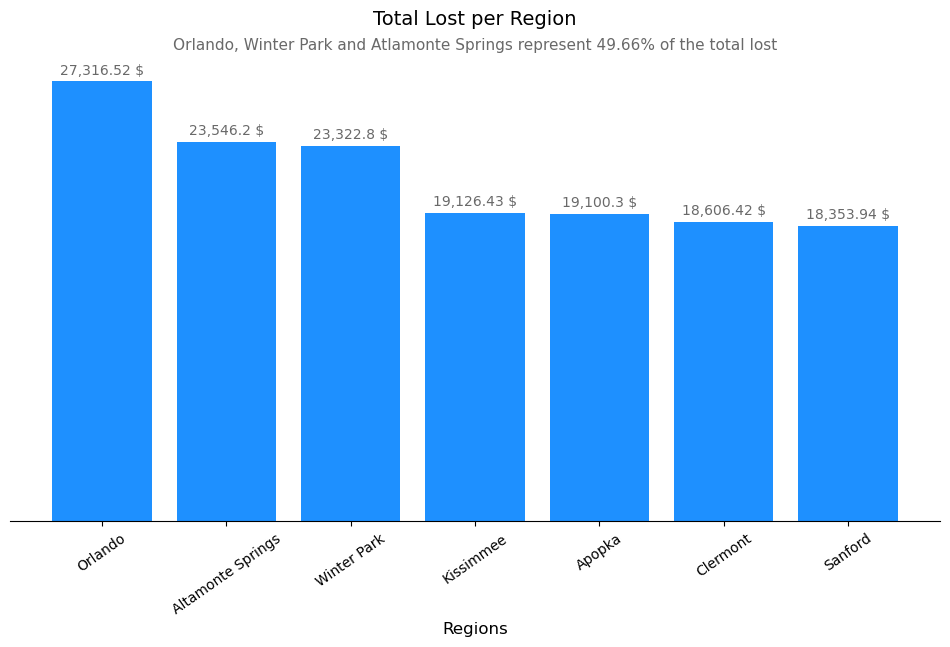

In [52]:
total_lost = df.groupby('region')['product_amount_price'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (12,6)) 
bar_chart = ax.bar(total_lost.index, total_lost.values, color = 'dodgerblue')

ax.set_title('Total Lost per Region', fontsize = 14, pad=25)
ax.set_xlabel('Regions', fontsize = 12)
ax.set_ylabel('') # Removethe Y label
ax.set_axisbelow(True) 
ax.grid(True, axis='y', alpha = 0.4, linestyle = '-')
ax.grid(False, axis='x') #bug ?
ax.bar_label(bar_chart, labels=[f'{round(x,2):,} $' for x in total_lost.values], padding = 3, fontsize = 10, color = "dimgrey") #For displaying the values on top of the bars

sns.despine(left=True)

plt.xticks(rotation=35)
plt.yticks([]) #Remove the Y label values
plt.text(0.5, 1.02, 'Orlando, Winter Park and Atlamonte Springs represent 49.66% of the total lost', transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")

plt.show()


In [53]:
# Calculate the percentage of the top 3 regions
regions = ['Orlando', 'Altamonte Springs', 'Winter Park']
total_lost_region = df.groupby('region')['product_amount_price'].sum()
select_total = total_lost_region.loc[regions].sum()
total_lost = total_lost_region.sum()
percentage = (select_total/total_lost)*100
print(percentage)

49.66474107937191


In [54]:
df_lost_cost_total.head()

,order_id,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7.0,2,0.286,Probable,WDID10064,Charlotte Davila,37,4,0.108,Probable
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12.0,2,0.167,Unlikely,WDID10389,Megan Smith,64,4,0.062,Unlikely
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9.0,2,0.222,Maybe,WDID10066,Ryan Gomez,60,4,0.067,Unlikely
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8.0,3,0.375,Very Probable,WDID10730,Kevin Gilmore,11,3,0.273,Very Probable
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13.0,4,0.308,Probable,WDID10740,Ronald Doyle,78,3,0.038,Very Unlikely
